In [3]:
from os import path

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from importnb import Notebook
import plotly.io as pio


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = Notebook.load_file(path.join("exploratory_analysis.ipynb")).df
pio.renderers.default = 'notebook_connected'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [ ]:
def get_year_production(liste: list, index: int) -> int:
    return liste[index]

def sum_production(liste: list) -> int:
    return sum(liste)

Production d'un aliment par pays.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             21477 non-null  object 
 1   Item             21477 non-null  object 
 2   Element          21477 non-null  object 
 3   latitude         21477 non-null  float64
 4   longitude        21477 non-null  float64
 5   years_evolution  21477 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1006.9+ KB


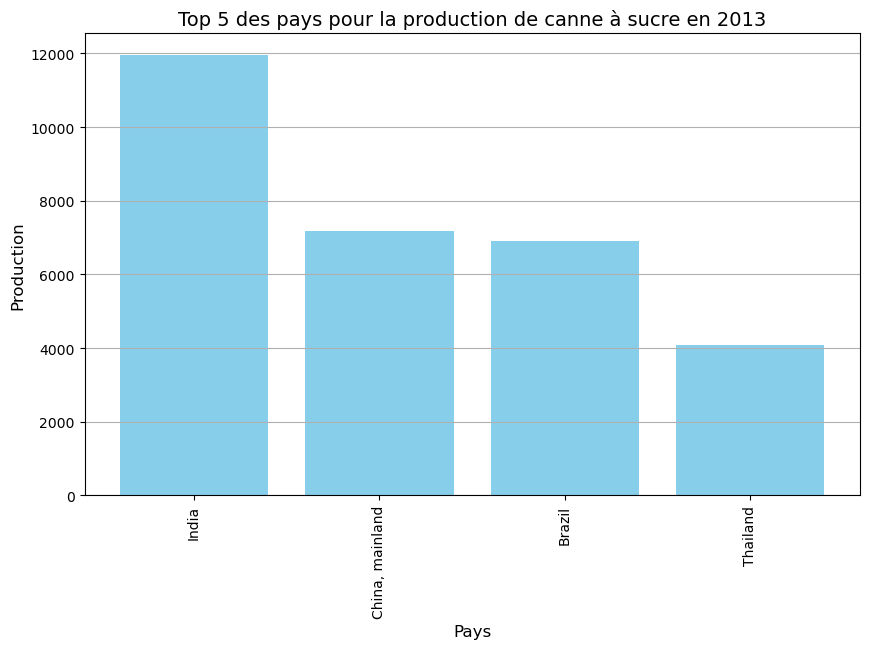

In [ ]:

df.info()
df_2013 = df.copy()
df_2013['years_evolution'] = df["years_evolution"].apply(get_year_production, args=(52,))
# Filtrer les données pour 'Sugar cane'
df_sugar_cane = df_2013[df_2013['Item'] == 'Sugar cane']

# Trier le DataFrame par la colonne 'Y2013' en ordre décroissant
df_sugar_cane_sorted = df_sugar_cane.sort_values('years_evolution', ascending=False)

# Sélectionner les 5 premières lignes
df_sugar_cane_top5 = df_sugar_cane_sorted.head(5)
# Créer un graphique à barres
plt.figure(figsize=(10,6))
plt.bar(df_sugar_cane_top5['Area'], df_sugar_cane_top5['years_evolution'], color='skyblue')
plt.title('Top 5 des pays pour la production de canne à sucre en 2013', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [ ]:
# Créer un graphique de dispersion géographique
fig = px.scatter_geo(df_2013.loc[df['Item'] == 'Sugar cane'], lat = 'latitude', lon = 'longitude', size = 'years_evolution')
fig.update_layout(
    title_text = 'Répartition mondiale de la production de canne à sucre en 2013',
    geo=dict(
        showframe = False,
        showcoastlines = True,
        coastlinecolor="Black",
        showland=True, 
        landcolor="green",
        showocean=True, 
        oceancolor="Azure",
        projection_type = "natural earth"
    )
)
fig.show()


/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



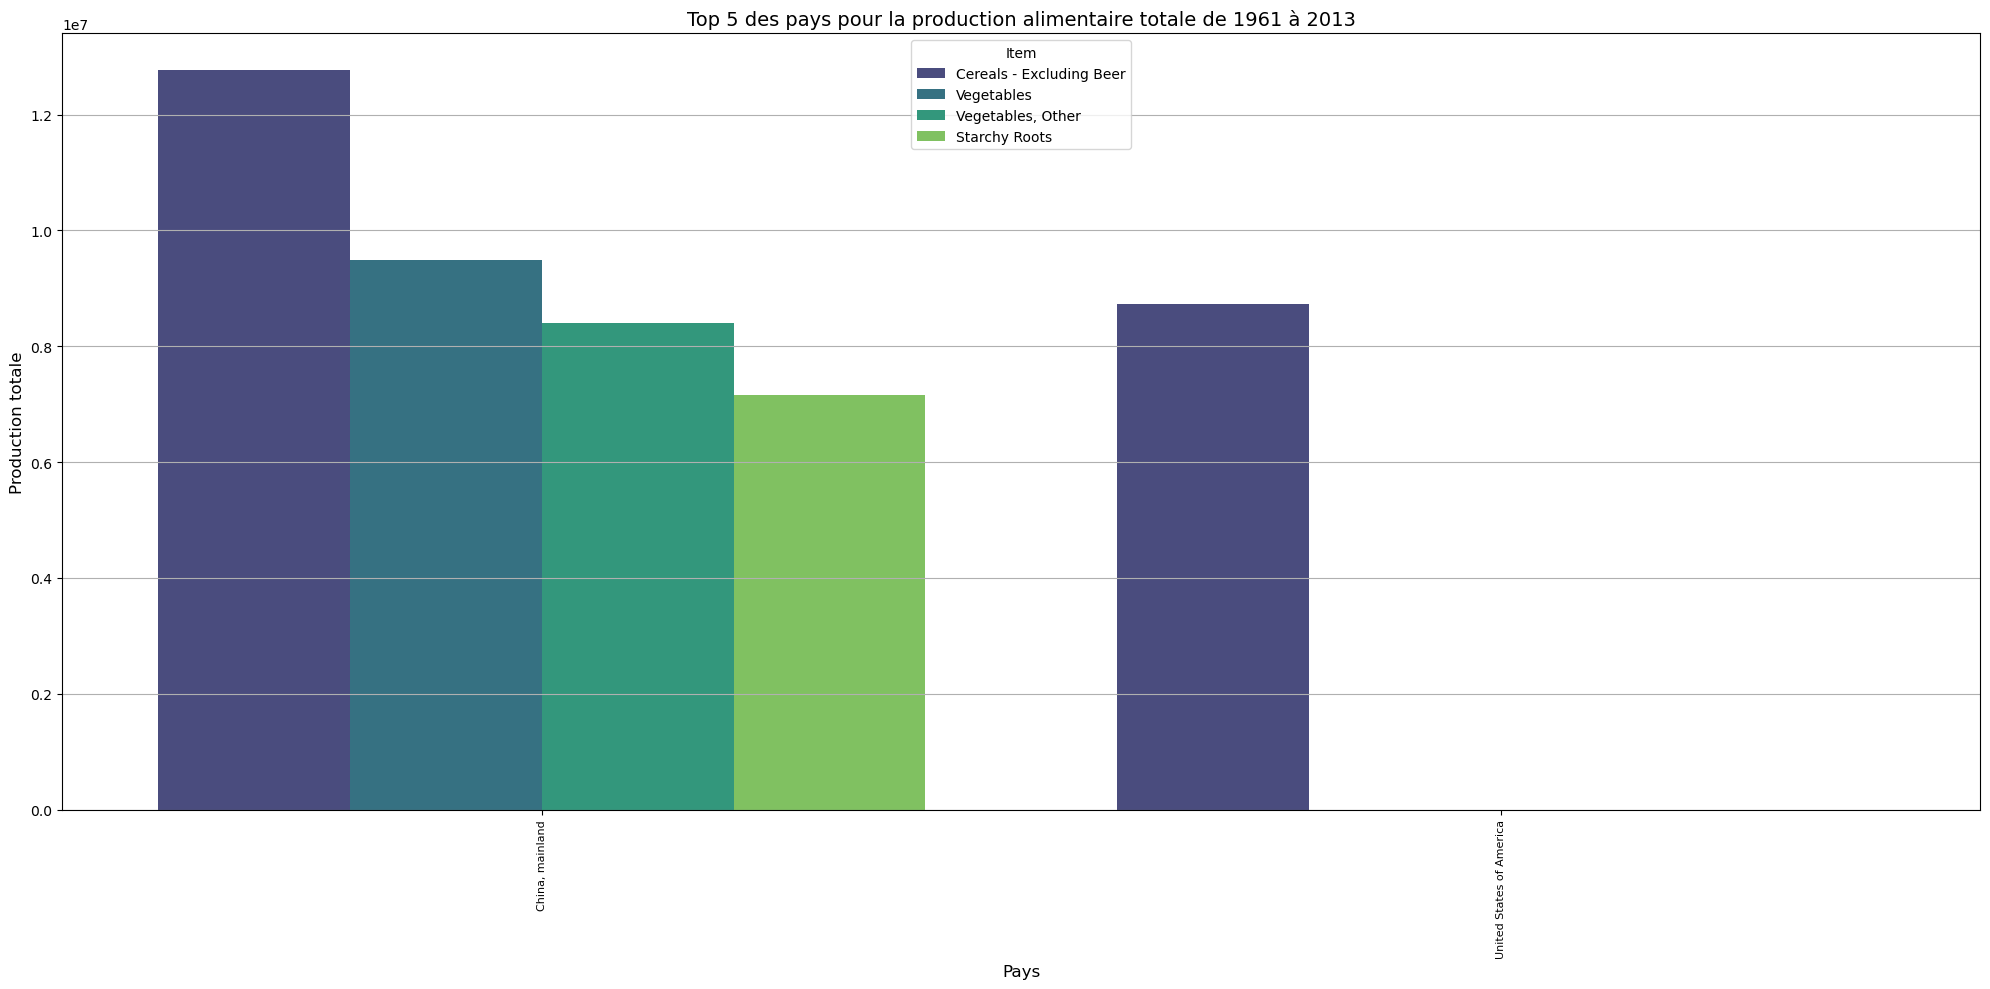

In [ ]:

df['Total'] = df["years_evolution"].apply(sum_production)

df_total = df.groupby(['Area', 'Item'])['Total'].sum().reset_index()


df_total_sorted = df_total.sort_values('Total', ascending=False)

df_top5 = df_total_sorted.head(5)

plt.figure(figsize=(20,10))  
sns.barplot(x='Area', y='Total', hue='Item', data=df_top5, palette='viridis')
plt.title('Top 5 des pays pour la production alimentaire totale de 1961 à 2013', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Production totale', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')
plt.tight_layout() 
plt.show()



In [ ]:
df_total_geo = df.groupby(['Area', 'Item', 'latitude', 'longitude'])['Total'].sum().reset_index()

fig = px.scatter_geo(df_total_geo, lat='latitude', lon='longitude', color='Item', size='Total', 
                     title='Répartition mondiale de la production alimentaire totale de 1961 à 2013')
fig.update_layout(
    geo=dict(
        showframe = False,
        showcoastlines = True,
        coastlinecolor="Black",
        showland=True, 
        landcolor="green",
        showocean=True, 
        oceancolor="Azure",
        projection_type = "natural earth"
    )
)
fig.show()


